In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from unpooling import unpool_layer2x2_batch

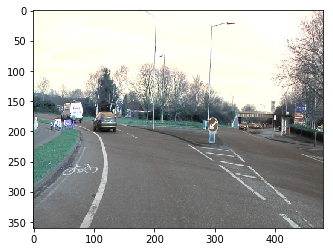

In [2]:
graph = tf.Graph()

with graph.as_default():
    
    input_data = tf.placeholder(tf.float32, shape=(1, 360, 480, 3))
    
    def Net(input_data):

        with tf.device('/gpu:0'):
                        
            pool_1, pool_1_argmax = tf.nn.max_pool_with_argmax(input_data, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            
            unpool_1 = unpool_layer2x2_batch(pool_1, pool_1_argmax)
            
            return pool_1, unpool_1
            
    output_data = Net(input_data)


with tf.Session(graph=graph) as session:
    
    image = cv2.imread('test.png', 1)
    plt.imshow(image) 
    image = np.reshape(image, (1, 360, 480, 3))

    
    tf.global_variables_initializer().run()
    
    
    feed_dict = {input_data : image}
    output_data = session.run([output_data], feed_dict = feed_dict)
    

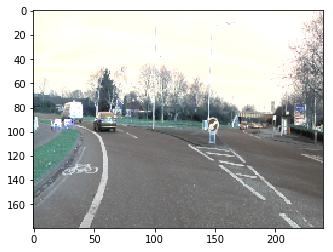

In [3]:
plt.imshow((output_data[0][0].reshape([180, 240, 3])).astype('uint8'))

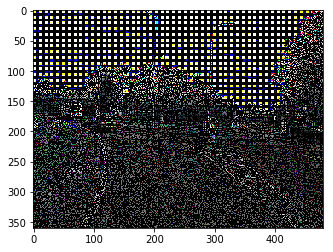

In [4]:
plt.imshow((output_data[0][1].reshape([360, 480, 3])).astype('uint8'))